# IEOR 4703 -- Monte Carlo Simulation for FE

### Comparison between Gibbs and Hamiltonian MC
### An example where Gibbs fails!

In [ ]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

1426


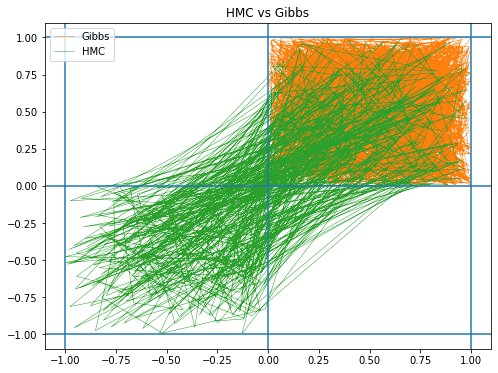

In [ ]:
N = 2000
e = 0.0632
L = 13

# array for gibbs
x_array1 = np.zeros((N+1, 2))
# initial point
x0 = np.random.rand(2)
if np.random.rand() < 0.5:
    x0 *= -1
x_array1[0] = x0

# array for hmc
x_array2 = np.copy(x_array1)

# gibbs sampling
for i in range(N):
    x_next = np.random.rand(2)
    if x_array1[i, 0] < 0:
        x_next *= -1
    x_array1[i+1] = x_next

# HMC sampling
count = 0
for i in range(N):
    y = np.random.randn(2)
    x = x_array2[i] - e*L*y
    if (0<x[0] and x[0]<1 and 0<x[1] and x[1]<1) or (-1<x[0] and x[0]<0 and -1<x[1] and x[1]<0):
        x_array2[i] = x
    else:
        count += 1
        x_array2[i] = x_array2[i-1]

print(count)

# plotting
plt.figure(figsize=(8,6))
plt.plot(x_array1[:,0], x_array1[:,1], color='C1', linewidth=0.5)
plt.plot(x_array2[:,0], x_array2[:,1], color='C2', linewidth=0.5)
plt.axvline(-1)
plt.axvline(0)
plt.axvline(1)
plt.axhline(-1)
plt.axhline(0)
plt.axhline(1)
plt.legend(['Gibbs', 'HMC'])
plt.title('HMC vs Gibbs')
plt.show()